In [2]:
"""
Arjun Srivastava
arj1
AMATH 301 B
"""

import numpy as np
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt
import scipy.interpolate

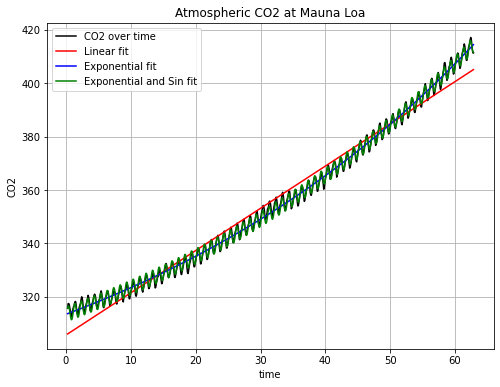

In [3]:
# Problem 1

data = np.genfromtxt('CO2_data.csv', delimiter=',')
t, co2 = data[0, :], data[1, :]
n = len(t)

# a)

coeffs = np.polyfit(t, co2, 1)
A1 = coeffs.reshape((1, 2))

yhat = np.polyval(coeffs, t)
A2 = np.sqrt((1 / n) * np.sum((yhat - co2) ** 2))

# b)

yhat2 = lambda arb : arb[0] * np.exp(arb[1]*t) + arb[2]
RMS_Error = lambda coeffs : np.sqrt((1 / n) * np.sum((yhat2(coeffs) - co2) ** 2))
coeff_min = scipy.optimize.minimize(RMS_Error, np.array([30, 0.03, 300]), method='Nelder-Mead')
A3, A4 = coeff_min.x.reshape(1, 3), RMS_Error(coeff_min.x)

# c)

yhat3 = lambda ARB : ARB[0] * np.exp(ARB[1]*t) + ARB[2] + ARB[3] * np.sin(ARB[4]*(t - ARB[5]))
RMS_Error2 = lambda coeffs : np.sqrt((1 / n) * np.sum((yhat3(coeffs) - co2) ** 2))
coeff_min2 = scipy.optimize.minimize(RMS_Error2, np.array([coeff_min.x[0], coeff_min.x[1], coeff_min.x[2], -5, 4, 0]), 
                                     method='Nelder-Mead', options={'maxiter': 1000})
A5, A6 = coeff_min2.x.reshape(1, 6), RMS_Error2(coeff_min2.x)

# Plot

plt.figure(figsize=(8, 6))
plt.title('Atmospheric CO2 at Mauna Loa')
plt.xlabel('time')
plt.ylabel('CO2')
plt.grid()
plt.plot(t, co2, 'k', t, yhat, 'r', t, yhat2(coeff_min.x), 'b', t, yhat3(coeff_min2.x), 'g')
plt.legend(['CO2 over time', 'Linear fit', 'Exponential fit', 'Exponential and Sin fit'])

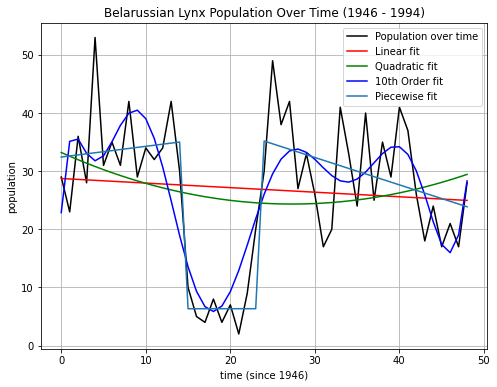

In [4]:
# Problem 2

data = np.genfromtxt('lynx.csv', delimiter=',')
t, pop = data[0, :], data[1, :]
pop[10], pop[28] = 34, 27
n = len(t)

# a)

interp_func = scipy.interpolate.interp1d(t, pop, kind='cubic')
A7 = interp_func(24.5)  # maybe pull value from array

# b)

coeffs = np.polyfit(t, pop, 1)
yhat = np.polyval(coeffs, t)
A8 = coeffs.reshape((1, 2))
A9 = np.sqrt((1 / n) * np.sum((yhat - pop) ** 2))

# c)

coeffs2 = np.polyfit(t, pop, 2)
yhat2 = np.polyval(coeffs2, t)
A10 = coeffs2.reshape((1, 3))
A11 = np.sqrt((1 / n) * np.sum((yhat2 - pop) ** 2))

# d)

coeffs3 = np.polyfit(t, pop, 10)
yhat3 = np.polyval(coeffs3, t)
A12 = coeffs3.reshape((1, 11))
A13 = np.sqrt((1 / n) * np.sum((yhat3 - pop) ** 2))

# e)

initial_guess = np.array([1, 0, -1, 40, 5, 30, 15.5, 20.5])

def lynx_func(coeffs, t):    
    m1 = coeffs[0]
    m2 = coeffs[1]
    m3 = coeffs[2]
    b1 = coeffs[3]
    b2 = coeffs[4]
    b3 = coeffs[5]
    t1 = coeffs[6]
    t2 = coeffs[7]
    if t <= t1:
        return m1 * t + b1
    elif t <= t2:
        return m2 * t + b2
    else:
        return m3 * t + b3
    
def lynxhat(coeffs):
    y = np.zeros(n)  # make new array of y values
    for t in range(n):
        y[t] = lynx_func(coeffs, t)  # update tth value of y array
    return y
    
RMS_Error = lambda coeffs : np.sqrt((1 / n) * np.sum((lynxhat(coeffs) - pop) ** 2))
coeff_min = scipy.optimize.minimize(RMS_Error, initial_guess, method='Nelder-Mead', options={'maxiter': 10000}) 
A14, A15 = coeff_min.x[-2:].reshape((1, 2)), RMS_Error(coeff_min.x)

# Plot

plt.figure(figsize=(8, 6))
plt.title('Belarussian Lynx Population Over Time (1946 - 1994)')
plt.xlabel('time (since 1946)')
plt.ylabel('population')
plt.grid()
plt.plot(t, pop, 'k', t, yhat, 'r', t, yhat2, 'g', t, yhat3, 'b', t, lynxhat(coeff_min.x))
plt.legend(['Population over time', 'Linear fit', 'Quadratic fit', '10th Order fit', 'Piecewise fit'])